In [1]:
import os

# Third Party Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelBinarizer

In [ ]:
sns.set()

In [ ]:

df = pd.read_csv('loan_approval_dataset.csv')

In [ ]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
df.shape

(4269, 13)

In [ ]:
df.dtypes

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

In [ ]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [ ]:
df.count

<bound method DataFrame.count of       loan_id   no_of_dependents      education  self_employed   income_annum  \
0           1                  2       Graduate             No        9600000   
1           2                  0   Not Graduate            Yes        4100000   
2           3                  3       Graduate             No        9100000   
3           4                  3       Graduate             No        8200000   
4           5                  5   Not Graduate            Yes        9800000   
...       ...                ...            ...            ...            ...   
4264     4265                  5       Graduate            Yes        1000000   
4265     4266                  0   Not Graduate            Yes        3300000   
4266     4267                  2   Not Graduate             No        6500000   
4267     4268                  1   Not Graduate             No        4100000   
4268     4269                  1       Graduate             No        920000

In [ ]:
#checking missings  number
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [ ]:
df[" loan_status"].value_counts()

 loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

<Axes: xlabel=' bank_asset_value', ylabel='count'>

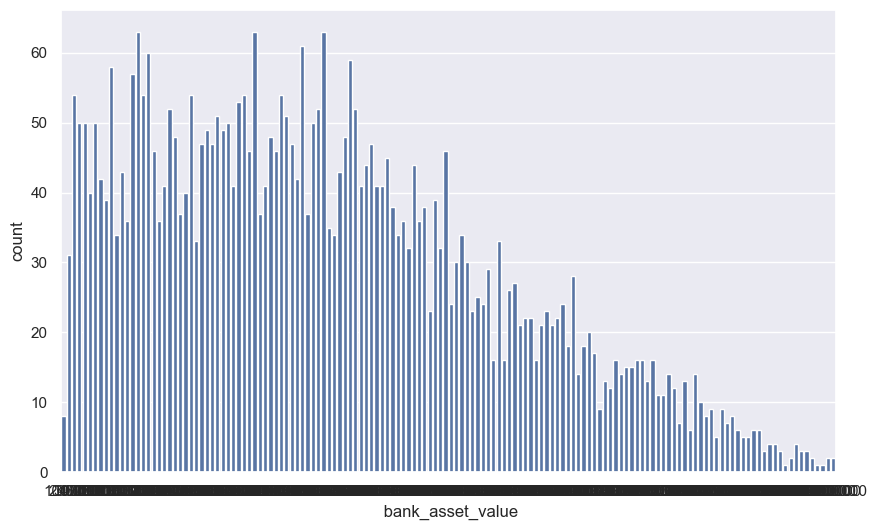

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data = df, x = " bank_asset_value")

<Axes: xlabel=' commercial_assets_value', ylabel='count'>

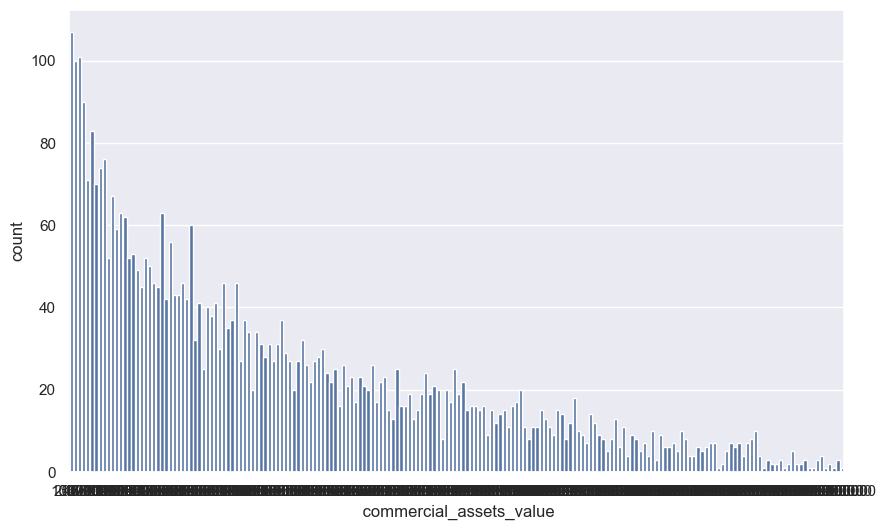

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data = df, x= " commercial_assets_value")

<Axes: xlabel=' residential_assets_value', ylabel='count'>

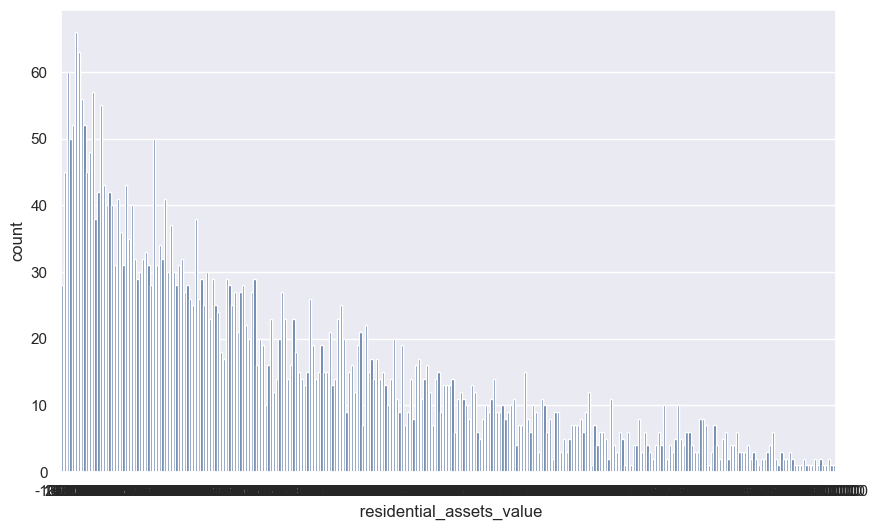

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data = df, x= " residential_assets_value")

<Axes: xlabel=' cibil_score', ylabel='count'>

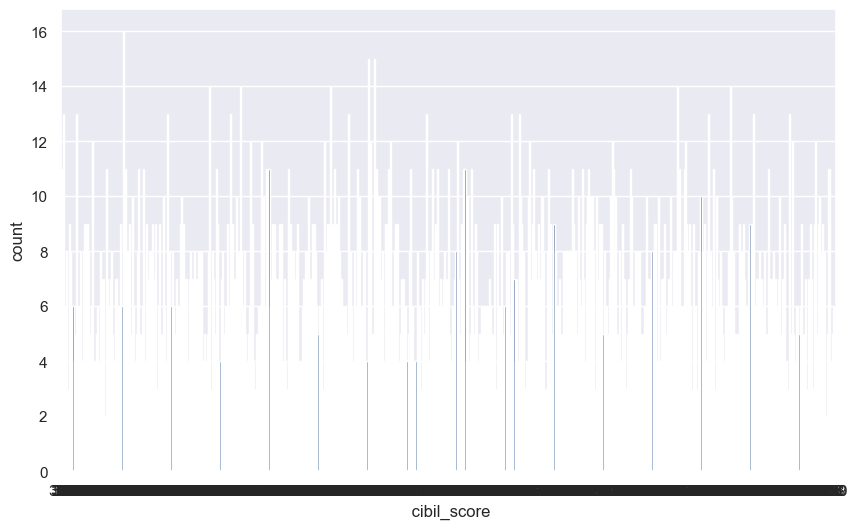

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data = df, x= " cibil_score")

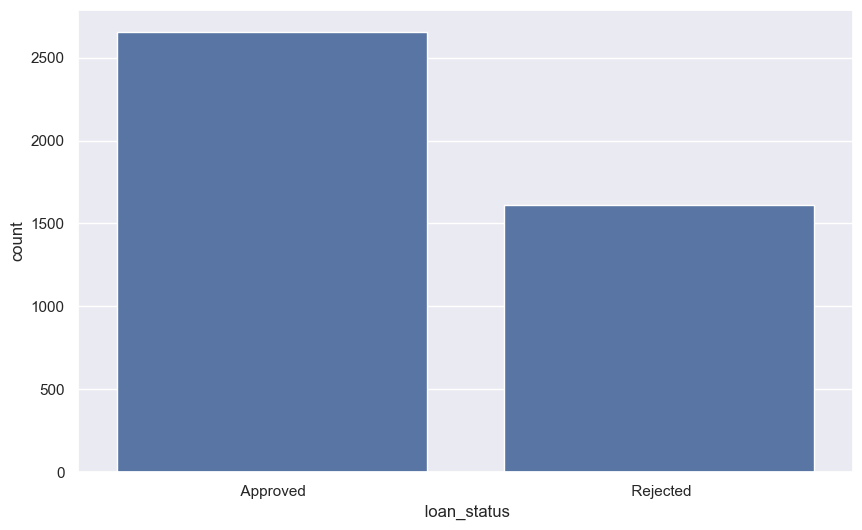

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data = df, x= " loan_status")
plt.show()

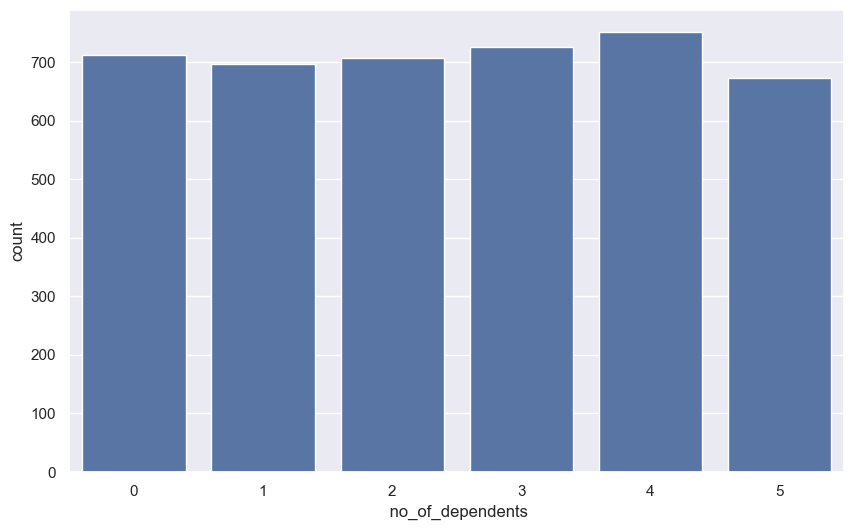

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data = df,x = " no_of_dependents")
plt.show()

<Axes: xlabel=' loan_status', ylabel=' loan_term'>

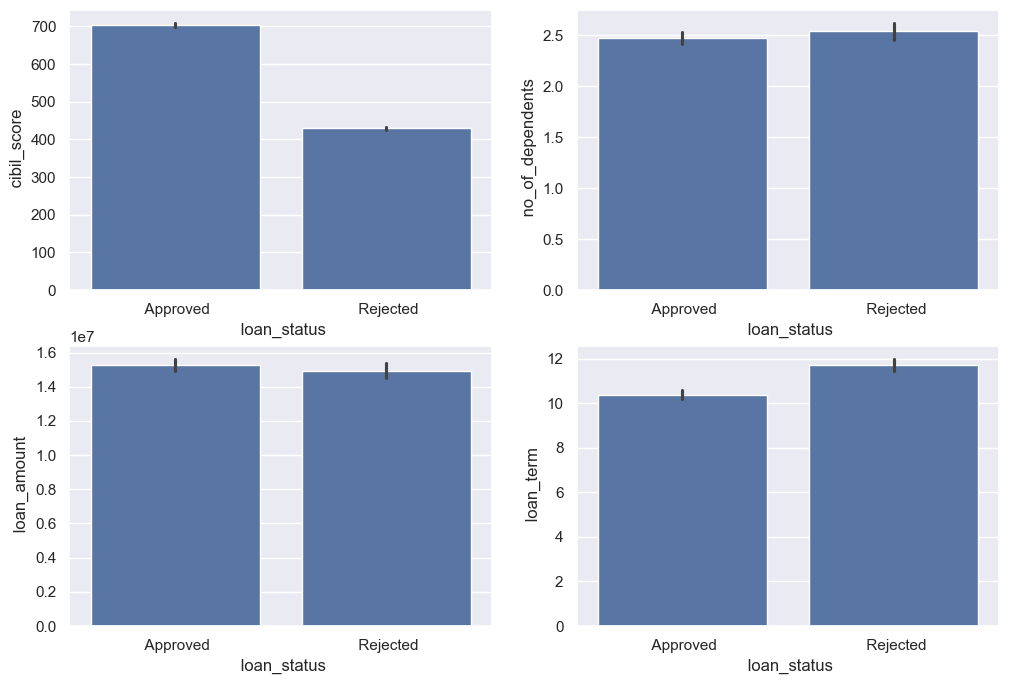

In [ ]:
#EDA
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.barplot(data = df,x = " loan_status",y = " cibil_score")
plt.subplot(2,2,2)
sns.barplot(data = df,x = " loan_status",y = " no_of_dependents")
plt.subplot(2,2,3)
sns.barplot(data = df,x = " loan_status",y = " loan_amount")
plt.subplot(2,2,4)
sns.barplot(data = df,x = " loan_status",y = " loan_term")


In [ ]:
df.loc[(df[" cibil_score"]> 750 ) & (df[" loan_status"] == " Rejected")]

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
236,237,3,Graduate,Yes,900000,3500000,4,770,700000,0,2000000,600000,Rejected
559,560,2,Graduate,Yes,200000,500000,6,885,-100000,0,300000,200000,Rejected
911,912,0,Graduate,Yes,1300000,4800000,4,835,500000,100000,3300000,800000,Rejected
3213,3214,1,Not Graduate,Yes,4300000,16300000,14,792,400000,400000,10200000,4000000,Rejected
3527,3528,0,Graduate,No,1800000,6900000,10,853,900000,400000,3700000,1700000,Rejected
4099,4100,3,Graduate,No,8700000,31100000,16,760,400000,1800000,19300000,4800000,Rejected


In [ ]:
df.loc[(df[" cibil_score"] > 750) & (df[" no_of_dependents"] >1)]

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
15,16,5,Not Graduate,No,4700000,10700000,10,794,5700000,3900000,16400000,4400000,Approved
17,18,4,Not Graduate,Yes,2900000,9400000,14,780,2900000,2800000,6700000,4300000,Approved
29,30,3,Not Graduate,Yes,9000000,31500000,10,850,21800000,12400000,33700000,8000000,Approved
33,34,5,Not Graduate,Yes,8400000,22000000,2,830,3800000,3900000,19900000,5400000,Approved
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4247,4248,3,Not Graduate,No,3100000,9800000,12,820,6400000,5200000,10900000,4400000,Approved
4249,4250,4,Graduate,No,1100000,4000000,14,887,2400000,1500000,4200000,1600000,Approved
4253,4254,5,Graduate,Yes,7000000,26200000,12,896,13100000,6600000,23600000,5700000,Approved
4261,4262,3,Graduate,Yes,3000000,7500000,6,881,1400000,4500000,6100000,2300000,Approved


In [ ]:
corr_matrix = df.corr(numeric_only=True)

In [ ]:
df.loc[(df[" no_of_dependents"] == 1) & (df[" loan_status"] ==" Rejected") & (df[ ' cibil_score'] > 750)]

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
3213,3214,1,Not Graduate,Yes,4300000,16300000,14,792,400000,400000,10200000,4000000,Rejected


In [ ]:
df.loc[(df[" residential_assets_value"]== df[" residential_assets_value"].max()) & (df[" loan_status"]==" Approved")]

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
3119,3120,4,Not Graduate,No,9800000,29400000,8,592,29100000,16700000,35900000,9000000,Approved


In [ ]:
df.loc[(df[" residential_assets_value"]== df[" residential_assets_value"].max()) & (df[" loan_status"]==" Rejected")]

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status


In [ ]:
df[" residential_assets_value"].max()

29100000

In [ ]:
df.loc[
    (df[" income_annum"] < df[" loan_amount"]) & 
    (df[" loan_status"] == " Rejected") & (df[" cibil_score"] >750)
]

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
236,237,3,Graduate,Yes,900000,3500000,4,770,700000,0,2000000,600000,Rejected
559,560,2,Graduate,Yes,200000,500000,6,885,-100000,0,300000,200000,Rejected
911,912,0,Graduate,Yes,1300000,4800000,4,835,500000,100000,3300000,800000,Rejected
3213,3214,1,Not Graduate,Yes,4300000,16300000,14,792,400000,400000,10200000,4000000,Rejected
3527,3528,0,Graduate,No,1800000,6900000,10,853,900000,400000,3700000,1700000,Rejected
4099,4100,3,Graduate,No,8700000,31100000,16,760,400000,1800000,19300000,4800000,Rejected


In [ ]:
df.loc[
    (df[" income_annum"] < df[" loan_amount"]) & 
    (df[" loan_status"] == " Approved") & (df[" cibil_score"] >750)
]

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
15,16,5,Not Graduate,No,4700000,10700000,10,794,5700000,3900000,16400000,4400000,Approved
17,18,4,Not Graduate,Yes,2900000,9400000,14,780,2900000,2800000,6700000,4300000,Approved
29,30,3,Not Graduate,Yes,9000000,31500000,10,850,21800000,12400000,33700000,8000000,Approved
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4249,4250,4,Graduate,No,1100000,4000000,14,887,2400000,1500000,4200000,1600000,Approved
4253,4254,5,Graduate,Yes,7000000,26200000,12,896,13100000,6600000,23600000,5700000,Approved
4261,4262,3,Graduate,Yes,3000000,7500000,6,881,1400000,4500000,6100000,2300000,Approved
4263,4264,3,Graduate,No,5000000,12700000,14,865,4700000,8100000,19500000,6300000,Approved


In [ ]:
#Encode categorical variables
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df[" education"] = le.fit_transform(df[" education"])
df[" self_employed"] = le.fit_transform(df[" self_employed"])
df[" loan_status"] = le.fit_transform(df[" loan_status"])

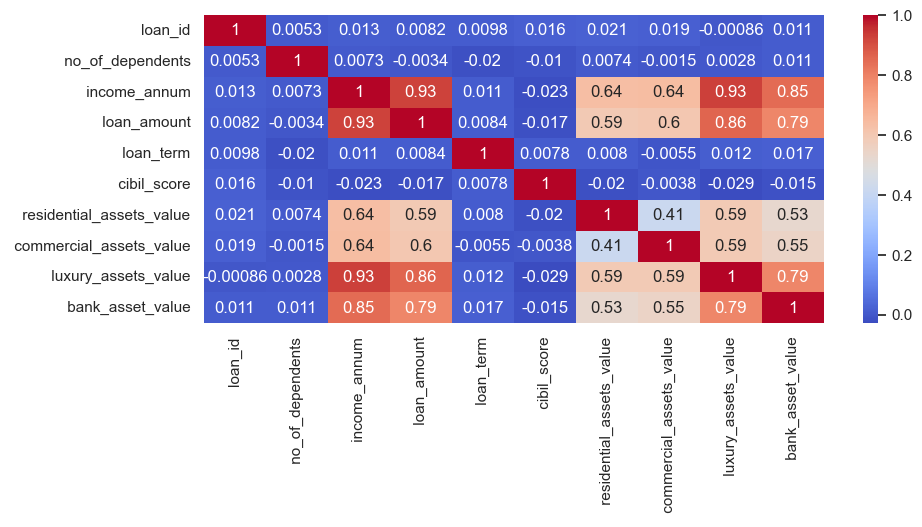

In [ ]:
plt.figure(figsize = (10, 4))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.show()

In [ ]:
test_size=0.2
random_state=42
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=test_size,random_state=random_state)

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),                      # Step 1: scale features
    ('classifier', LogisticRegression())               #step 2: define the model
])

In [ ]:
x = df.drop([" loan_status"],axis = 1)
y = df[" loan_status"].values

In [ ]:
pipeline.fit(xtrain,ytrain)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression())])

In [ ]:
x_pred = pipeline.predict(xtest)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(ytest, x_pred))

Accuracy: 0.9074941451990632
